# Salary dataset

# 1. Read dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
salaries = pd.read_csv('./Salary_Data.csv')

In [27]:
salaries

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [30]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


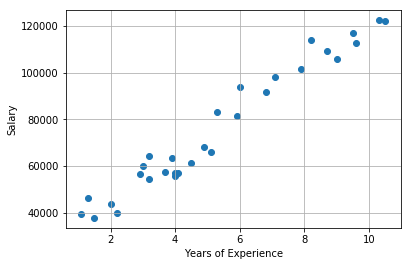

In [31]:
plt.scatter(x=salaries['YearsExperience'], y=salaries['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()

## Split dataset into Training and Testing test

In [32]:
from sklearn.model_selection import train_test_split

In [87]:
# double [[]] means 2 dimensions
X = salaries[['YearsExperience']]
y = salaries['Salary']

#random_state is the way to pick random. If set to default which is none, results will be different
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state=101)


In [88]:
X_test = X_test.sort_index()
X_train = X_train.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()


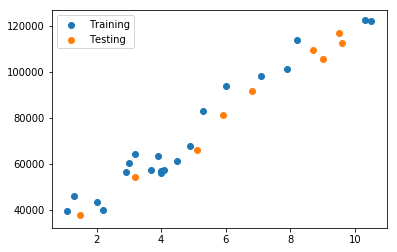

In [89]:
plt.scatter(X_train, y_train, label='Training')
plt.scatter(X_test, y_test, label='Testing')
plt.legend()
plt.show()

# 3. Linear Regession


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
#Create model
model = LinearRegression()

In [92]:
#Train model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
model.intercept_

25975.814659541124

In [94]:
model.coef_

array([9577.17174975])

In [95]:
#Prediction
predictions = model.predict(X_test)

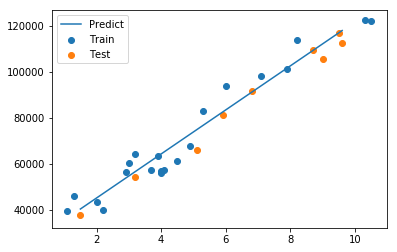

In [96]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_test, predictions, label='Predict')
plt.legend()
plt.show()

# Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
#Create a poly object 
poly = PolynomialFeatures(degree=4)

In [99]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [100]:
X_train.head()

,YearsExperience
0,1.1
1,1.3
3,2.0
4,2.2
5,2.9


In [101]:
X_train_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01],
       [1.00000000e+00, 2.20000000e+00, 4.84000000e+00, 1.06480000e+01,
        2.34256000e+01],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02],
       [1.00000000e+00, 3.70000000e+00, 1.36900000e+01, 5.06530000e+01,
        1.87416100e+02],
       [1.00000000e+00, 3.90000000e+00, 1.52100000e+01, 5.93190000e+01,
        2.31344100e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02],
       [1.00000000e+00, 4.0000

In [102]:
poly_model = LinearRegression()

In [103]:
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
#Predicting
predictions_poly = poly_model.predict(X_test_poly)

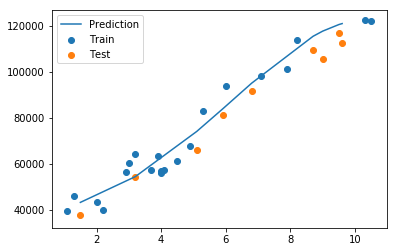

In [105]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_test, predictions_poly, label='Prediction')
plt.legend()
plt.show()